### RAMI Benchmarking

See https://rami-benchmark.jrc.ec.europa.eu/HTML/RAMI4PILPS/RAMI4PILPS.php

In [12]:
# Add PATH (adapt!)

push!(LOAD_PATH, "/Users/braghier/Documents/CliMA/CliMA-land/Land/src/Radiation/");
push!(LOAD_PATH, "/Users/braghier/Documents/CliMA/CliMA-land/Land/src/Utils/");
#push!(LOAD_PATH, "/Volumes/cfranken/code/gitHub/LSM-SPAM/src/tools/");

# Use Plots:
using Plots
#using PhotoStructs
plotly()

Plots.PlotlyBackend()

In [15]:
using CanopyRT
using BenchmarkTools
using Statistics
using Parameters
using Revise
using Leaf

┌ Info: Precompiling Land [27e3c115-2cb8-4114-b7a5-cd9f011f9dcc]
└ @ Base loading.jl:1273
ERROR: LoadError: LoadError: ArgumentError: Package RootSolvers [7181ea78-2dcb-4de3-ab41-2b8ab5a31e74] is required but does not seem to be installed:
 - Run `Pkg.instantiate()` to install all recorded dependencies.

Stacktrace:
 [1] _require(::Base.PkgId) at ./loading.jl:993
 [2] require(::Base.PkgId) at ./loading.jl:922
 [3] require(::Module, ::Symbol) at ./loading.jl:917
 [4] include at ./boot.jl:328 [inlined]
 [5] include_relative(::Module, ::String) at ./loading.jl:1105
 [6] include at ./Base.jl:31 [inlined]
 [7] include(::String) at /Users/braghier/Documents/CliMA/CliMA-land/Land/src/Land.jl:1
 [8] top-level scope at /Users/braghier/Documents/CliMA/CliMA-land/Land/src/Land.jl:8
 [9] include at ./boot.jl:328 [inlined]
 [10] include_relative(::Module, ::String) at ./loading.jl:1105
 [11] include(::Module, ::String) at ./Base.jl:31
 [12] top-level scope at none:2
 [13] eval at ./boot.jl:330 [inl

ErrorException: Failed to precompile Land [27e3c115-2cb8-4114-b7a5-cd9f011f9dcc] to /Users/braghier/.julia/compiled/v1.3/Land/q0FLS_vcZMG.ji.

In [13]:
@unpack wl,wle,wlf, soil = CanopyRTMod;

LoadError: UndefVarError: @unpack not defined

In [4]:
arrayOfLeaves = Array{leafbio{FT,length(wl), length(wle), length(wlf),length(wle)*length(wlf)}, 1}(undef, CanopyRTMod.canopy.nlayers)
for i = 1:CanopyRTMod.canopy.nlayers
    #@show i
    arrayOfLeaves[i] = leafbio{FT, length(wl), length(wle), length(wlf),length(wle)*length(wlf)}()
    CanopyRTMod.fluspect!(arrayOfLeaves[i], CanopyRTMod.optis)
end


In [12]:
RAMI_SZA = [27.,60.,83.]

RAMI_fabsRed_050_BLK =  [0.09380509999999999, 0.16259713, 0.53931207]
RAMI_frefRed_050_BLK =  [0.00330673, 0.00517598, 0.01626682]
RAMI_ftranRed_050_BLK =  [0.90288817, 0.83222689, 0.44442110999999995]
RAMI_fabsRed_150_BLK =  [0.28137804, 0.46514268999999997, 0.89063486]
RAMI_frefRed_150_BLK =  [0.00923676, 0.01379672, 0.02970703]
RAMI_ftranRed_150_BLK =  [0.7093851999999999, 0.52106059, 0.07965811]
RAMI_fabsRed_250_BLK =  [0.46852539, 0.70426097, 0.9461774300000001]
RAMI_frefRed_250_BLK =  [0.01445858, 0.02016963, 0.03477486]
RAMI_ftranRed_250_BLK =  [0.51701603, 0.2755694, 0.01904771]
RAMI_fabsRed_050_MED =  [0.10897124, 0.17760124000000002, 0.54764719]
RAMI_frefRed_050_MED =  [0.09759354, 0.09107608, 0.06177913]
RAMI_ftranRed_050_MED =  [0.90337609, 0.83265704, 0.44469279]
RAMI_fabsRed_150_MED =  [0.31403827, 0.49003033, 0.89432051]
RAMI_frefRed_150_MED =  [0.06195053, 0.05151941, 0.03561715]
RAMI_ftranRed_150_MED =  [0.7104761399999999, 0.52197456, 0.07977039000000001]
RAMI_fabsRed_250_MED =  [0.50540545, 0.72429659, 0.94742381]
RAMI_frefRed_250_MED =  [0.03953053, 0.03315039, 0.03580858]
RAMI_ftranRed_250_MED =  [0.51811911, 0.27616192, 0.01909098]
RAMI_fabsRed_050_SNW =  [0.21471034, 0.28200132, 0.60564705]
RAMI_frefRed_050_SNW =  [0.7526521700000001, 0.6879087300000001, 0.37825442000000004]
RAMI_ftranRed_050_SNW =  [0.90659694, 0.83583194, 0.44718138]
RAMI_fabsRed_150_SNW =  [0.5431621799999999, 0.66519762, 0.9201217300000001]
RAMI_frefRed_150_SNW =  [0.43100610000000006, 0.31581022999999997, 0.07698033]
RAMI_ftranRed_150_SNW =  [0.71754777, 0.52755972, 0.08049832999999999]
RAMI_fabsRed_250_SNW =  [0.76512258, 0.86538802, 0.9562473199999999]
RAMI_frefRed_250_SNW =  [0.21595537, 0.124503, 0.043056080000000004]
RAMI_ftranRed_250_SNW =  [0.5256125, 0.280805, 0.01935]

RAMI_fabsNIR_050_BLK =  [0.04188343, 0.07274452000000001, 0.24100884]
RAMI_frefNIR_050_BLK =  [0.033454239999999996, 0.05472391, 0.17891176]
RAMI_ftranNIR_050_BLK =  [0.92466233, 0.87253157, 0.5800794]
RAMI_fabsNIR_150_BLK =  [0.1334535, 0.22169851000000002, 0.42073783]
RAMI_frefNIR_150_BLK =  [0.09744051000000001, 0.15314946000000002, 0.33329437]
RAMI_ftranNIR_150_BLK =  [0.76910599, 0.62515203, 0.2459678]
RAMI_fabsNIR_250_BLK =  [0.23394282, 0.35396922000000003, 0.46386535]
RAMI_frefNIR_250_BLK =  [0.15761001, 0.2319992, 0.39099052]
RAMI_ftranNIR_250_BLK =  [0.60844717, 0.41403157999999995, 0.14514412999999998]
RAMI_fabsNIR_050_MED =  [0.054370659999999994, 0.08547336, 0.25007769]
RAMI_frefNIR_050_MED =  [0.21168520000000002, 0.22133924, 0.28852533]
RAMI_ftranNIR_050_MED =  [0.9340088299999999, 0.8821422699999999, 0.58716846]
RAMI_fabsNIR_150_MED =  [0.16424751, 0.24776159, 0.43111234000000004]
RAMI_frefNIR_150_MED =  [0.21422398999999998, 0.24624797999999998, 0.36978966999999996]
RAMI_ftranNIR_150_MED =  [0.79094998, 0.6439175699999999, 0.2533698]
RAMI_fabsNIR_250_MED =  [0.27409287, 0.38176366, 0.473585]
RAMI_frefNIR_250_MED =  [0.22649945, 0.27795485, 0.40721736999999997]
RAMI_ftranNIR_250_MED =  [0.63554044, 0.43303829, 0.15168952000000002]
RAMI_fabsNIR_050_SNW =  [0.07514770999999999, 0.10651483, 0.26529625]
RAMI_frefNIR_050_SNW =  [0.50400231, 0.49535178, 0.46933011999999996]
RAMI_ftranNIR_050_SNW =  [0.9495712500000001, 0.89831541, 0.59876721]
RAMI_fabsNIR_150_SNW =  [0.21784508, 0.29322135, 0.44918252000000003]
RAMI_frefNIR_150_SNW =  [0.41475434, 0.40704062, 0.43282195]
RAMI_ftranNIR_150_SNW =  [0.82897242, 0.67630421, 0.2662354]
RAMI_fabsNIR_250_SNW =  [0.34668661, 0.4322433, 0.49112654999999994]
RAMI_frefNIR_250_SNW =  [0.34992203000000005, 0.36066338000000003, 0.43639102]
RAMI_ftranNIR_250_SNW =  [0.68454729, 0.46726832, 0.16354338]

3-element Array{Float64,1}:
 0.68454729
 0.46726832
 0.16354338

In [80]:
#Soil albedo
#BLK
#CanopyRTMod.soil.albedo_SW[:] .=0.0;
#MED
#CanopyRTMod.soil.albedo_SW[:] .=0.1217;
#SNW
CanopyRTMod.soil.albedo_SW[:] .=0.9640;


reflRed_SZA = []
reflNIR_SZA = []
absRed_SZA = []
absNIR_SZA = []
transRed_SZA = []
transNIR_SZA = []

#Clumping index
#Sparse
CanopyRTMod.canopy.Ω = 0.365864235
#Medium
#CanopyRTMod.canopy.Ω = 0.405417644
#Dense
#CanopyRTMod.canopy.Ω = 0.45946608

#CanopyRTMod.canopy.Ω = 1.0

#Viewing Zenith Angle in degrees
CanopyRTMod.angles.tto=0.0
#Leaf Area index
#Sparse
CanopyRTMod.canopy.LAI=0.50265
#Medium
#CanopyRTMod.canopy.LAI=1.5017
#Dense
#CanopyRTMod.canopy.LAI=2.5007

for SZA=0.0:1:85
    CanopyRTMod.angles.tts=SZA  

   CanopyRTMod.fluspect!(leaf, CanopyRTMod.optis)
   CanopyRTMod.computeCanopyGeomProps!(canopy, angles,canOpt)
   CanopyRTMod.computeCanopyMatrices!(arrayOfLeaves,canOpt);

   # leaf reflectance RED
   leaf.ρ_SW[28] = 0.0735
   # leaf transmittance
   leaf.τ_SW[28]= 0.0566 
    
   # leaf reflectance NIR
   leaf.ρ_SW[52] = 0.3912
   # leaf transmittance
   leaf.τ_SW[52]= 0.4146 
    
    CanopyRTMod.RTM_SW!(canopy, canOpt, canRad,sunRad, CanopyRTMod.soil);
    push!(reflRed_SZA, canRad.alb_direct[28])
    push!(reflNIR_SZA, canRad.alb_direct[52])
    push!(absRed_SZA, (sum(canRad.netSW_shade,dims=2)[28,1].+sum(canRad.netSW_sunlit,dims=2)[28,1])./(sunRad.E_diffuse[28].+sunRad.E_direct[28]))
    push!(absNIR_SZA, (sum(canRad.netSW_shade,dims=2)[28,1].+sum(canRad.netSW_sunlit,dims=2)[28,1])./(sunRad.E_diffuse[28].+sunRad.E_direct[28]))
    push!(transRed_SZA,  ((1. .- (sum(canRad.netSW_shade,dims=2)[28,1].+sum(canRad.netSW_sunlit,dims=2)[28,1])./(sunRad.E_diffuse[28].+sunRad.E_direct[28]) .- canRad.alb_direct[28])./(1. .- CanopyRTMod.soil.albedo_SW[1])))
    push!(transNIR_SZA,  ((1. .- (sum(canRad.netSW_shade,dims=2)[52,1].+sum(canRad.netSW_sunlit,dims=2)[52,1])./(sunRad.E_diffuse[52].+sunRad.E_direct[52]) .- canRad.alb_direct[52])./(1. .- CanopyRTMod.soil.albedo_SW[1])))
end


In [81]:
SZA=0:1:85

plot(SZA, reflRed_SZA,label="reflectance")
plot!(SZA, absRed_SZA,label="absorptance")
plot!(SZA, transRed_SZA,label="transmittance")

scatter!(RAMI_SZA, RAMI_frefRed_050_SNW,label="RAMI reflectance")
scatter!(RAMI_SZA, RAMI_fabsRed_050_SNW,label="RAMI absorptance")
scatter!(RAMI_SZA, RAMI_ftranRed_050_SNW,label="RAMI transmittance")
ylabel!("Radiation Partitioning")
xlabel!("Sun Zenith Angle")
plot!(xlims = (0.0, 90.), ylims = (-0.05, 1.0), xticks = 0:20:91., yticks = 0:0.2:1.0)

<!DOCTYPE html>
 
 
 Plots.jl

In [82]:
#RMSE_abs = ((((absRed_SZA[28] .- RAMI_fabsRed_050_BLK[1])^2 + (absRed_SZA[61] .- RAMI_fabsRed_050_BLK[2])^2 + (absRed_SZA[84] .- RAMI_fabsRed_050_BLK[3])^2))./3.)^(0.5) 
#RMSE_ref = ((((reflRed_SZA[28] .- RAMI_frefRed_050_BLK[1])^2 + (reflRed_SZA[61] .- RAMI_frefRed_050_BLK[2])^2 + (reflRed_SZA[84] .- RAMI_frefRed_050_BLK[3])^2))./3.)^(0.5) 
#RMSE_tran = ((((transRed_SZA[28] .- RAMI_ftranRed_050_BLK[1])^2 + (transRed_SZA[61] .- RAMI_ftranRed_050_BLK[2])^2 + (transRed_SZA[84] .- RAMI_ftranRed_050_BLK[3])^2))./3.)^(0.5) 

#RMSE_abs = ((((absRed_SZA[28] .- RAMI_fabsRed_050_MED[1])^2 + (absRed_SZA[61] .- RAMI_fabsRed_050_MED[2])^2 + (absRed_SZA[84] .- RAMI_fabsRed_050_MED[3])^2))./3.)^(0.5) 
#RMSE_ref = ((((reflRed_SZA[28] .- RAMI_frefRed_050_MED[1])^2 + (reflRed_SZA[61] .- RAMI_frefRed_050_MED[2])^2 + (reflRed_SZA[84] .- RAMI_frefRed_050_MED[3])^2))./3.)^(0.5) 
#RMSE_tran = ((((transRed_SZA[28] .- RAMI_ftranRed_050_MED[1])^2 + (transRed_SZA[61] .- RAMI_ftranRed_050_MED[2])^2 + (transRed_SZA[84] .- RAMI_ftranRed_050_MED[3])^2))./3.)^(0.5) 

RMSE_abs = ((((absRed_SZA[28] .- RAMI_fabsRed_050_SNW[1])^2 + (absRed_SZA[61] .- RAMI_fabsRed_050_SNW[2])^2 + (absRed_SZA[84] .- RAMI_fabsRed_050_SNW[3])^2))./3.)^(0.5) 
RMSE_ref = ((((reflRed_SZA[28] .- RAMI_frefRed_050_SNW[1])^2 + (reflRed_SZA[61] .- RAMI_frefRed_050_SNW[2])^2 + (reflRed_SZA[84] .- RAMI_frefRed_050_SNW[3])^2))./3.)^(0.5) 
RMSE_tran = ((((transRed_SZA[28] .- RAMI_ftranRed_050_SNW[1])^2 + (transRed_SZA[61] .- RAMI_ftranRed_050_SNW[2])^2 + (transRed_SZA[84] .- RAMI_ftranRed_050_SNW[3])^2))./3.)^(0.5) 


print(RMSE_abs," ")
print(RMSE_ref," ")
#print(RMSE_tran," ")

RMSE_tot = ((RMSE_abs^2 + RMSE_ref^2 + RMSE_tran^2.)/3.)^0.5
#RMSE_tot_2 =  ((RMSE_abs + RMSE_ref + RMSE_tran)/3.)
#RMSE_tot_3 = (((absRed_SZA[28] .- RAMI_fabsRed_050_BLK[1])^2 + (absRed_SZA[61] .- RAMI_fabsRed_050_BLK[2])^2 + (absRed_SZA[84] .- RAMI_fabsRed_050_BLK[3])^2
             #+ (reflRed_SZA[28] .- RAMI_frefRed_050_BLK[1])^2 + (reflRed_SZA[61] .- RAMI_frefRed_050_BLK[2])^2 + (reflRed_SZA[84] .- RAMI_frefRed_050_BLK[3])^2 
             #+ (transRed_SZA[28] .- RAMI_ftranRed_050_BLK[1])^2 + (transRed_SZA[61] .- RAMI_ftranRed_050_BLK[2])^2 + (transRed_SZA[84] .- RAMI_ftranRed_050_BLK[3])^2)./9.)^(0.5) 



print(RMSE_tot," ")
#print(RMSE_tot_2," ")
#print(RMSE_tot_3," ")


0.06626652142852257 0.01818332425624355 0.7997042529968349 

In [83]:
SZA=0:1:85
plot(SZA, reflNIR_SZA,label="reflectance")
plot!(SZA, absNIR_SZA,label="absorptance")
plot!(SZA, transNIR_SZA,label="transmittance")

scatter!(RAMI_SZA, RAMI_reflNIR_050_BLK,label="RAMI reflectance")
scatter!(RAMI_SZA, RAMI_absNIR_050_BLK,label="RAMI absorptance")
scatter!(RAMI_SZA, RAMI_transNIR_050_BLK,label="RAMI transmittance")
ylabel!("Radiation Partitioning")
xlabel!("Sun Zenith Angle")

<!DOCTYPE html>
 
 
 Plots.jl

In [22]:
# Test plots from Christiaan's papers

In [22]:
reflVIS = Float32[]
reflNIR = Float32[]
SIF_FR = Float32[]
SIF_R  = Float32[]
CanopyRTMod.angles.tts=48
CanopyRTMod.angles.psi=0
CanopyRTMod.canopy.LAI=4.22
for psi=0:359
    CanopyRTMod.angles.psi=psi
    for VZA=0:1:85
        CanopyRTMod.angles.tto=VZA

        CanopyRTMod.computeCanopyGeomProps!(canopy, angles,canOpt);
        CanopyRTMod.computeCanopyMatrices!(arrayOfLeaves,canOpt);
        CanopyRTMod.RTM_SW!(canopy, canOpt, canRad,sunRad, CanopyRTMod.soil);
        CanopyRTMod.computeSIF_Fluxes!(arrayOfLeaves, canOpt, canRad, canopy, CanopyRTMod.soil);
        push!(reflVIS, canRad.alb_obs[28])
        push!(reflNIR, canRad.alb_obs[52])
        push!(SIF_R , canRad.SIF_obs[8])
        push!(SIF_FR, canRad.SIF_obs[20])
    end
end

In [23]:
psi = 350.0
psi2 = abs(psi-FT(360.0)*round(psi/FT(360.0)))
@show CanopyRTMod.volscatt(48.0,89,psi2,85)
@show CanopyRTMod.volscatt(48.0,89,psi,85)


CanopyRTMod.volscatt(48.0, 89, psi2, 85) = (0.47276348919520245, 0.6341013900132804, 0.11570885645438916, 0.00010470239727699943)
CanopyRTMod.volscatt(48.0, 89, psi, 85) = (0.47276348919520245, 0.6341013900132804, 0.011902455121961818, -0.10370169893515034)


(0.47276348919520245, 0.6341013900132804, 0.011902455121961818, -0.10370169893515034)

In [24]:
A = reshape(reflNIR, ( 86,360));
B = reshape(reflVIS, ( 86,360));
SIFFER = reshape(SIF_R, ( 86,360));
SIFFER_FR = reshape(SIF_FR, ( 86,360));

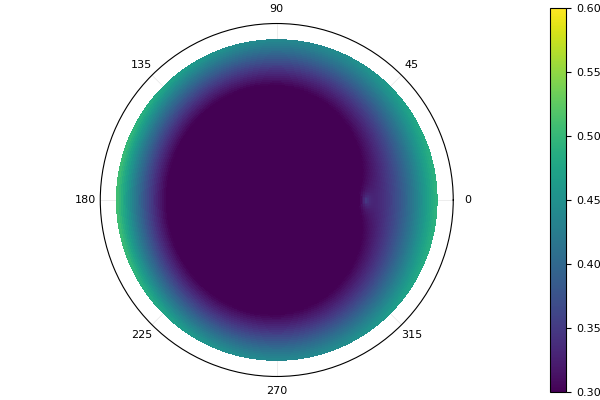

In [25]:
using Plots; pyplot()

#heatmap(A, cmap=)
hm = heatmap(deg2rad.(collect((0:359))),collect(0:1:85),  A,  proj=:polar, color=:viridis,clim=(0.3,0.6))

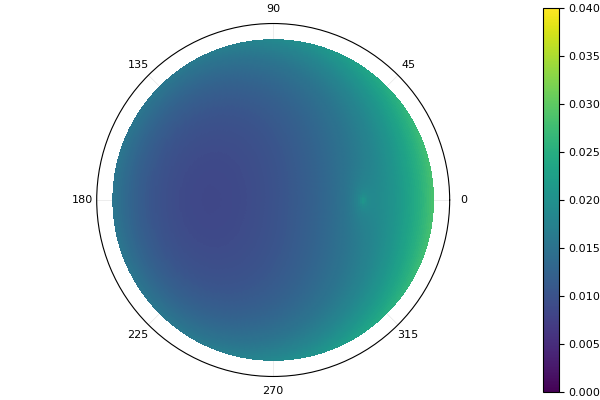

In [26]:
#heatmap(A, cmap=)
hm = heatmap(deg2rad.(collect((0:359))),collect(0:1:85),  B,  proj=:polar, color=:viridis,clim=(0.0,0.04))

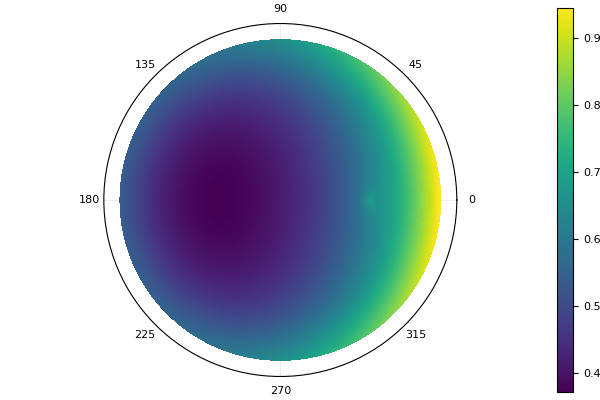

In [27]:
hm = heatmap(deg2rad.(collect((0:359))),collect(0:1:85),  SIFFER, proj=:polar, color=:viridis)

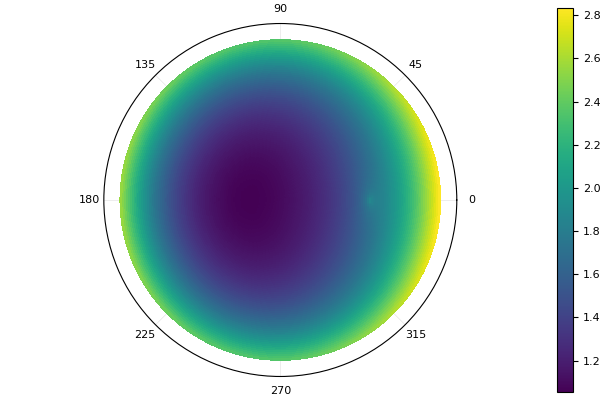

In [28]:
hm = heatmap(deg2rad.(collect((0:359))),collect(0:1:85),  SIFFER_FR, proj=:polar, color=:viridis)

In [29]:
psi

350.0

In [202]:

@show CanopyRTMod.volscatt(35.0,70.0,0.,89.)
@show CanopyRTMod.volscatt(35.0,70.0,360.,89.)

CanopyRTMod.volscatt(35.0, 70.0, 0.0, 89.0) = (0.36520793168285853, 0.5981478605598526, 0.08578330686751329, 5.832539063667912e-8)
CanopyRTMod.volscatt(35.0, 70.0, 360.0, 89.0) = (0.36520793168285853, 0.5981478605598526, 0.0034155619880974226, -0.08236768655402524)


(0.36520793168285853, 0.5981478605598526, 0.0034155619880974226, -0.08236768655402524)

In [30]:
using LinearAlgebra
using StaticArrays
θ_l = 30.0;
θ_s = 30.0;
φ_l = 0.0;
θ_o = 40.0;
φ_o = 180.0;

In [31]:
l =  [cosd(θ_l); sind(θ_l)*cosd(φ_l);sind(θ_l)*sind(φ_l)];
n =  [1.0; 0.0; 0.0]
s =  [cosd(θ_s); sind(θ_s); 0]
o =  [cosd(θ_o); sind(θ_o)*cosd(φ_o);sind(θ_o)*sind(φ_o)];

In [32]:
@show cosd(θ_l)*(1 + tand(θ_s)*tand(θ_l)*cosd(φ_l))
@show (s⋅l)/(s⋅n)
@show (o⋅l)/(o⋅n)
@show (cosd(θ_s)*cosd(θ_l) + sind(θ_s)*sind(θ_l)*cosd(φ_l))/cosd(θ_s)

cosd(θ_l) * (1 + tand(θ_s) * tand(θ_l) * cosd(φ_l)) = 1.1547005383792517
(s ⋅ l) / (s ⋅ n) = 1.1547005383792515
(o ⋅ l) / (o ⋅ n) = 0.44647558819579863
(cosd(θ_s) * cosd(θ_l) + sind(θ_s) * sind(θ_l) * cosd(φ_l)) / cosd(θ_s) = 1.1547005383792515


1.1547005383792515

In [33]:
chi_s = []
chi_o = []
frho = []
ftau = []
for VZA=-85:1.01:85
    chi_s_,chi_o_,frho_,ftau_ = CanopyRTMod.volscatt(30.0,VZA,0 ,45)
    push!(chi_s,chi_s_)
    push!(chi_o,chi_o_)
    push!(frho,frho_)
    push!(ftau,ftau_)
end
    

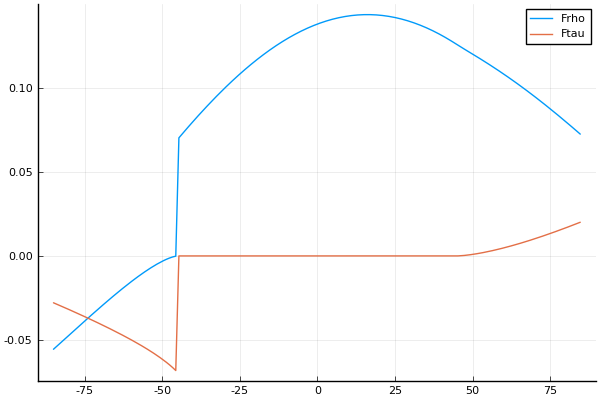

In [34]:
VZA=-85:1.01:85
plot(VZA,(frho), label="Frho")
plot!(VZA,(ftau), label="Ftau")

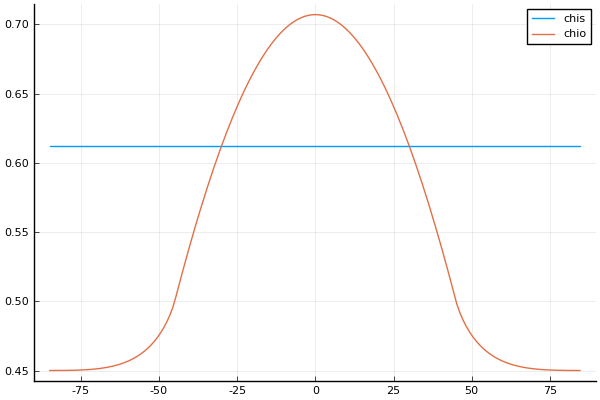

In [35]:
VZA=-85:1.01:85
plot(VZA,(chi_s), label="chis")
plot!(VZA,(chi_o), label="chio")

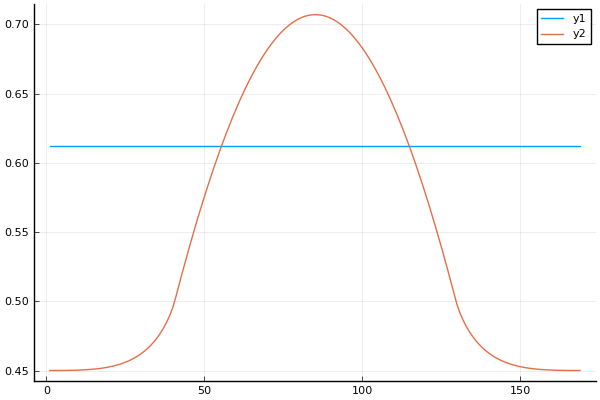

In [36]:
plot(chi_s)
plot!(chi_o)

In [37]:
if true || false || false 
    println("dd")
end

dd
